<a href="https://colab.research.google.com/github/AmalSM07/AmalSM07/blob/main/Zomato_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Zomato data .csv to Zomato data .csv


In [ ]:
data_frame = pd.read_csv("Zomato data .csv")
print(data_frame)


                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [ ]:
def HandleRate(values):
  values = str(values).split('/')
  values = values[0]
  return float(values)

data_frame['rate'] = data_frame['rate'].apply(HandleRate)
print(data_frame.head())



                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of Restaurant')

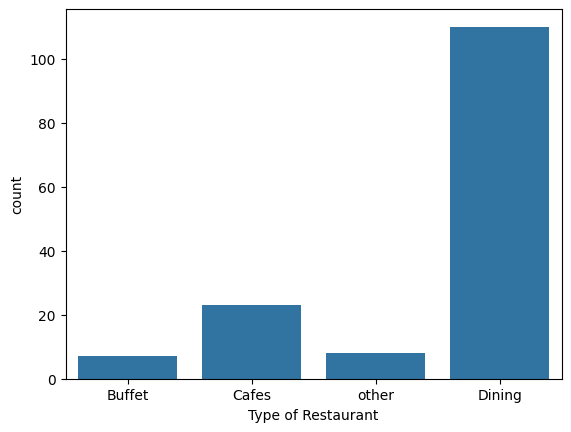

In [ ]:
sns.countplot(x=data_frame['listed_in(type)'])
plt.xlabel("Type of Restaurant")

Text(0, 0.5, 'Votes')

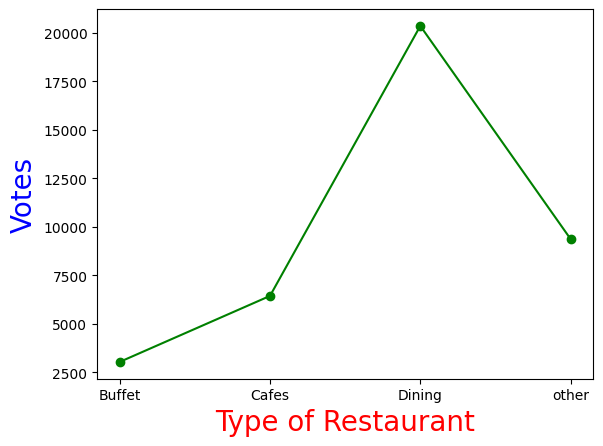

In [ ]:
grouped_data = data_frame.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker = "o")
plt.xlabel('Type of Restaurant',c='red',size = 20)
plt.ylabel('Votes',c = 'blue',size =20)

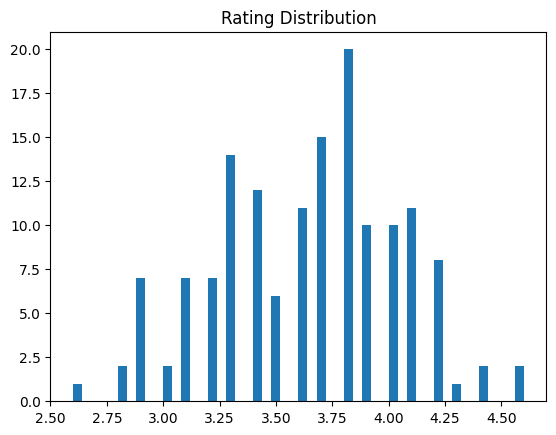

In [ ]:
plt.hist(data_frame['rate'],bins = 50)
plt.title('Rating Distribution')
plt.show()


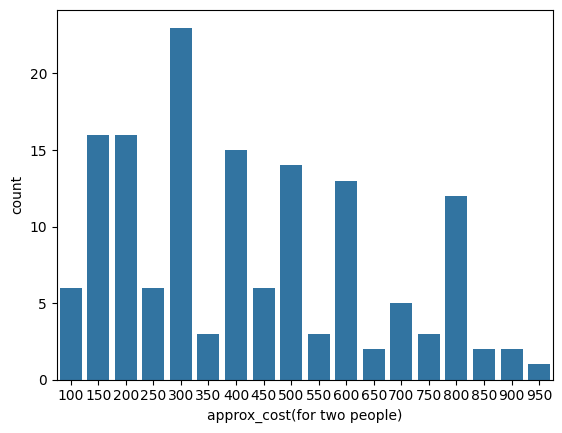

In [ ]:
couple_spent = data_frame['approx_cost(for two people)']
sns.countplot(x=couple_spent)
plt.show()

<Axes: xlabel='online_order', ylabel='rate'>

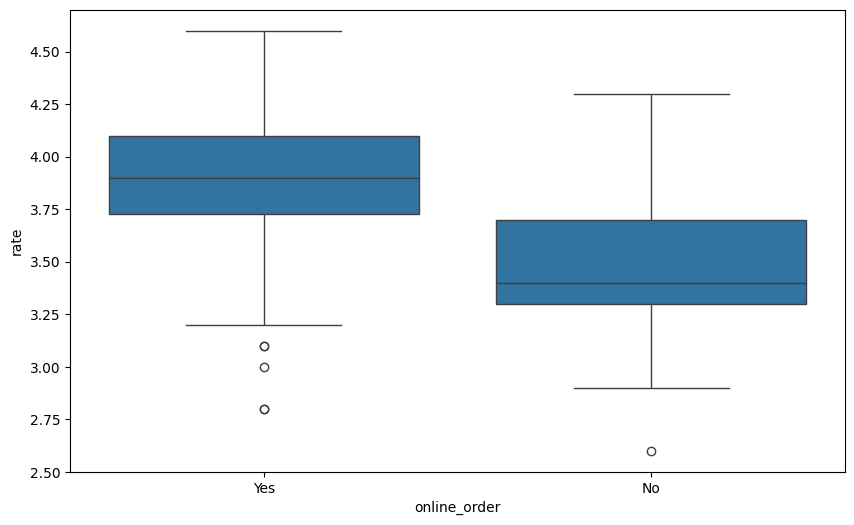

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='online_order', y='rate', data=data_frame)

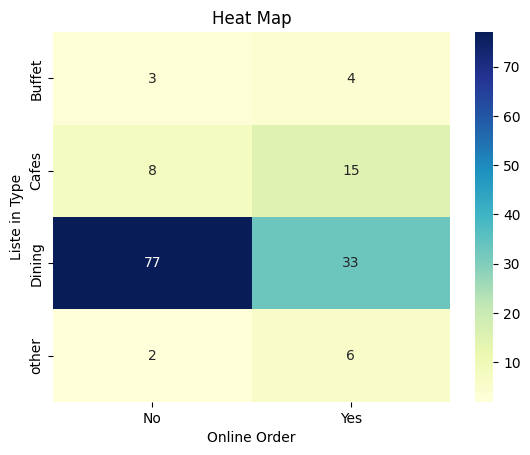

In [ ]:
pivot_table = data_frame.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, annot =True, cmap = 'YlGnBu', fmt = 'd')
plt.title('Heat Map')
plt.xlabel('Online Order')
plt.ylabel('Liste in Type')
plt.show()
